# Distribución de probabilidad Binomial
1. Una distribución de probabilidad es una distribución que indica la probabilidad de cada valor de la variable aleatoria. 
2. A menudo se expresa como gráfica, tabla o fórmula.
3. Una distribución de probabilidad es como una distribución de frecuencias, 
    + en dónde la frecuencia o valor correspondiente a cada valor de x es un valor de probabilidad.
###### Ver Distribución discreta de probabilidad binomial en: https://www.chreinvent.com/recursos/distribuci%C3%B3n-binomial    

In [1]:
import math
from statistics import mean, median, mode, variance, stdev
from itertools import accumulate
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import binom

## Vuelos sobresaturados
Air America tiene la política de registrar tantas como 15 personas en un avión en el que sólo hay cupo para 14. 
+ (Estudios anteriores han revelado que sólo el 85% de los pasajeros registrados llegan para tomar el vuelo). 
+ Calcule la probabilidad de que, si Air America registra a 15 personas, no haya suficientes asientos disponibles. 
+ ¿Será la probabilidad lo suficientemente baja para que la sobreventa no sea un problema real para los pasajeros?

### Parametros

In [2]:
# Definición de parámetros del problema
n = 15  # Asientos registrados
p = 0.85  # Probabilidad de graduarse
x = [ x for x in range(n+1)] # x varia de 0 a n

### Construcción de la distribución binomial

In [3]:
# Calculo de la distribución de probabilidad binomial
# Lista con las probabilidades simples para cada x
d_prob = [binom.pmf(x, n, p) for x in range(n + 1)]

# Lista con las probabilidades acumuladas para cada x
d_prob_ac = list(accumulate(d_prob))

# Lista con las probabilidades acumuladas en orden inverso
d_prob_ac_inv = list(accumulate(d_prob[::-1]))[::-1]

# Imprimir cada número con dos decimales usando f-string # for num in dist_prob_ac: print(f"{num:.2f}")

### Tabla y Gráficos
+ Probabilidades: La suma de la probabilidad debe dar 1
+ Media: La suma-producto de x por su probabilidad debe dar la media
+ Varianza: La suma-producto de x al cuadrado por la probabilidad menos la media debe dar la varianza
+ Desviación Estandard: La raiz cuadrada de la varianza debe dar la desviación estandard

In [4]:
# Dataframe: Tabla de datos
df_gr = pd.DataFrame(
    {
        'x': x,
        'p': d_prob,
        'x.p': [x[i] * d_prob[i] for i in range(n+1)],
        'xx.p': [x[i]**2 * d_prob[i] for i in range(n+1)],
        'p-acu': d_prob_ac,
        'p-acr': d_prob_ac_inv      
    }
)
print(df_gr.round(3).set_index('x'))


        p    x.p    xx.p  p-acu  p-acr
x                                     
0   0.000  0.000   0.000  0.000  1.000
1   0.000  0.000   0.000  0.000  1.000
2   0.000  0.000   0.000  0.000  1.000
3   0.000  0.000   0.000  0.000  1.000
4   0.000  0.000   0.000  0.000  1.000
5   0.000  0.000   0.000  0.000  1.000
6   0.000  0.000   0.003  0.000  1.000
7   0.001  0.004   0.026  0.001  1.000
8   0.003  0.024   0.192  0.004  0.999
9   0.013  0.119   1.070  0.017  0.996
10  0.045  0.449   4.490  0.062  0.983
11  0.116  1.272  13.992  0.177  0.938
12  0.218  2.621  31.454  0.396  0.823
13  0.286  3.713  48.273  0.681  0.604
14  0.231  3.237  45.321  0.913  0.319
15  0.087  1.310  19.655  1.000  0.087



Estadísticos:
Sumatoria de probabilidades: 1.0000000000000002
Media y Esperanza          : 12.750000000000002
Varianza                   : 1.912
Desviación Estandard       : 1.383
Revisión de estadísticos por scipy:
mean: 8.50, var: 1.28, skew: -0.62, kurt: 0.18.


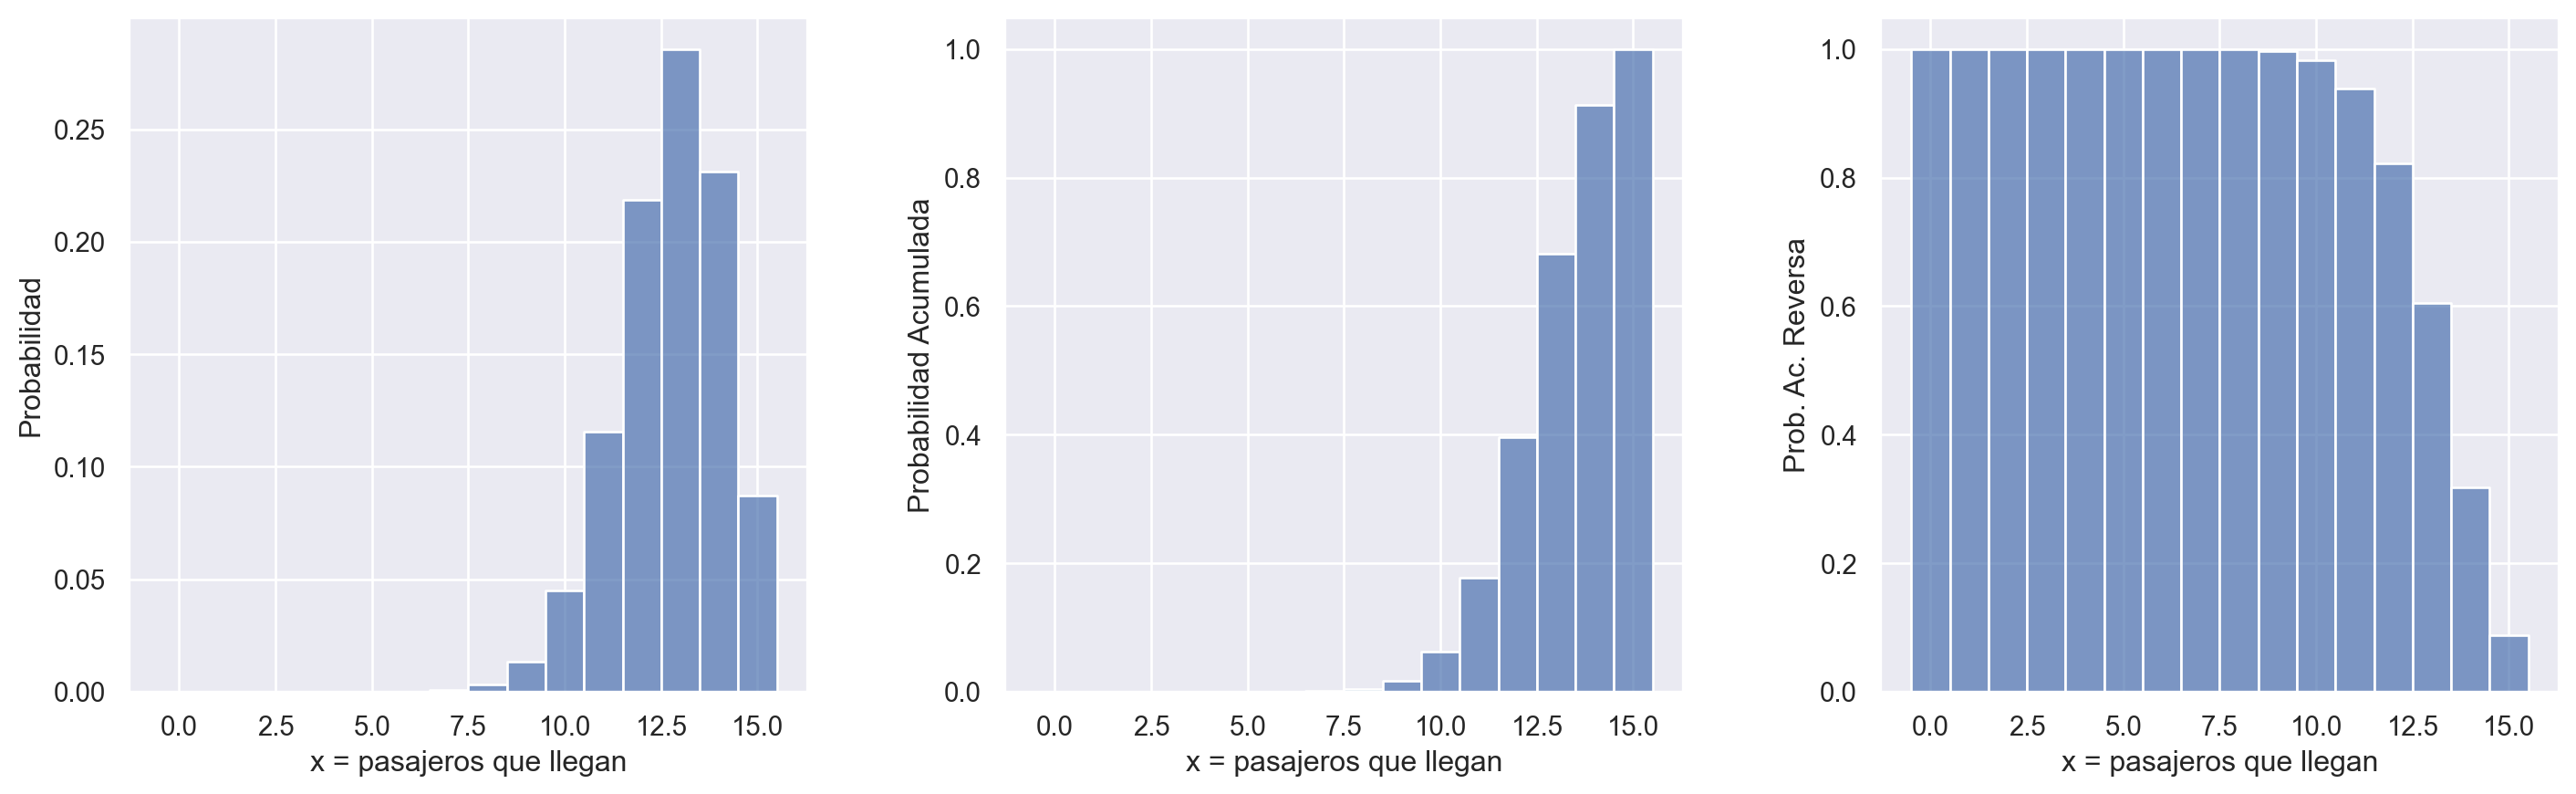

In [11]:

# Estadisticos: Calculo de la media de la distribución de probabilidad
print(f"\nEstadísticos:")

# Calculos: sumatoria de probabilidades, media, varianza y desviación estandard
sumprob = df_gr.p.sum()
media = df_gr['x.p'].sum()
sum_xx_p = df_gr['xx.p'].sum()
varianza = sum_xx_p - media ** 2
desvstan = math.sqrt(varianza)

# Impresión de estadísticos
print(f"Sumatoria de probabilidades: {sumprob}")
print(f"Media y Esperanza          : {media}")
print(f"Varianza                   : {varianza:.3f}")
print(f"Desviación Estandard       : {desvstan:.3f}")

# Revisión de estadísticos por Scipy
# La función de distribución binomial de SciPy binom.stats devuelve: Los momentos de primero a cuarto orden:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

print("Revisión de estadísticos por scipy:")
print(f"mean: {mean:.2f}, var: {var:.2f}, skew: {skew:.2f}, kurt: {kurt:.2f}.")

# Gráficos
# Distribución de probabilidad binomial
f = mpl.figure.Figure(figsize=(15, 5))
sf1, sf2, sf3 = f.subfigures(1, 3)

# Visualización Probabilidades
(
    so.Plot(df_gr, x="x", y="p")
    .add(so.Bars(),)
    .label(x="x = pasajeros que llegan", y="Probabilidad")
    .on(sf1)
    .plot()
)

# Visualización Probabilidades Acumuladas
(
    so.Plot(df_gr, x="x", y="p-acu")
    .add(so.Bars())
    .label(x="x = pasajeros que llegan", y="Probabilidad Acumulada")
    .on(sf2)
    .plot()
)

# Visualización Probabilidades Acumuladas Invertidas
(
    so.Plot(df_gr, x="x", y="p-acr")
    .add(so.Bars())
    .label(x="x = pasajeros que llegan", y="Prob. Ac. Reversa")
    .on(sf3)
)



##### Observaciones:
+ El numero de pasajeros que probablemente quieran tomar el vuelo: 12. (Esperanza:  12.750000000000002)
    + La probabilidad de que esto suceda será algo como 22% (entre 0.218 y 0.286).
+ La distribución está sesgada a la izquierda (sesgo negativo):
    + La probabilidad (simple) decrece por encima del valor esperado.
    + La probabilidad (acumulada) crece en tanto se tomen más observaciones dentro de la muestra.
    + El desvío es un poco mayor a 1. (entre 11 y 13)

### Resultados más esperables y menos esperables
Regla práctica del intervalo: a) valor mínimo + común   : media - dos desvíos estandard.    b) valor máximo + común  : media  + dos desvios estandard.  

In [6]:
# Calculos de valores minimo y máximo comunes dentro de los cuales se encuentra el 95% 
# de los valores de la distribución de probabilidad.
val_min_comun = media - 2 * desvstan
val_max_comun = media + 2 * desvstan

# Impresión de resultados
print(f"Intervalo de confianza:")
print(f"media: {media:.2f}, desv.std.: {desvstan:.2f}, 2 x desv.: {2*desvstan:.2f}.")
print(f"Valor mínimo más común: {val_min_comun:.2f} y Valor máximo más común: {val_max_comun:.2f}")
print(f"Los valores más probables de x están entre {val_min_comun:.2f} y {val_max_comun:.2f}")
print(f"El valor más esperable es: {media:.2f}")

Intervalo de confianza:
media: 12.75, desv.std.: 1.38, 2 x desv.: 2.77.
Valor mínimo más común: 9.98 y Valor máximo más común: 15.52
Los valores más probables de x están entre 9.98 y 15.52
El valor más esperable es: 12.75


**Interpretación:** El intevalo de confianza refleja que:
+ Es esperable que cantidad de pasajeros estén entre 10 y 15 en el 95% de los casos.
    + El 95% de los resultados más probables se encuentra desviado a la derecha (sesgo negativo):
        + Es más probable que se presenten muchos de los pasajeros a tomar el vuelo que pocos.
        + Es poco probable que pocos pasageros lleguen a tomar el avión.
    + El 5% de los resultados menos probables se encuentran a la izquierda.
        + Para menos de 8 pasajeros, la probabilidad decrece significativamente (p-acr).
        + Es difícil que por azar entre 0 y 8 pasajeros solamente se presenten a tomar el avión.

#### Resultados infrecuentes
+ Uso de las probabilidades para determinar resultados infrecuentes
    + Número de éxitos inusualmente alto: x éxitos en n ensayos es un número inusualmente alto de éxitos si P(x o más)  0.05.*
    + Número de éxitos inusualmente bajo: x éxitos en n ensayos es un número inusualmente bajo de éxitos si P(x o menos)  0.05.*
+ *El valor de 0.05 se utiliza de forma regular (coincide con el intervalo de confianza 95%), pero no es absolutamente rígido. 
    + Se podrían usar otros valores, como 0.01, para distinguir entre sucesos que pueden ocurrir con facilidad por azar y sucesos que tienen muy pocas probabilidades de ocurrir por azar.

        p    x.p    xx.p  p-acu  p-acr
x                                     
0   0.000  0.000   0.000  0.000  1.000
1   0.000  0.000   0.000  0.000  1.000
2   0.000  0.000   0.000  0.000  1.000
3   0.000  0.000   0.000  0.000  1.000
4   0.000  0.000   0.000  0.000  1.000
5   0.000  0.000   0.000  0.000  1.000
6   0.000  0.000   0.003  0.000  1.000
7   0.001  0.004   0.026  0.001  1.000
8   0.003  0.024   0.192  0.004  0.999
9   0.013  0.119   1.070  0.017  0.996
10  0.045  0.449   4.490  0.062  0.983
11  0.116  1.272  13.992  0.177  0.938
12  0.218  2.621  31.454  0.396  0.823
13  0.286  3.713  48.273  0.681  0.604
14  0.231  3.237  45.321  0.913  0.319
15  0.087  1.310  19.655  1.000  0.087


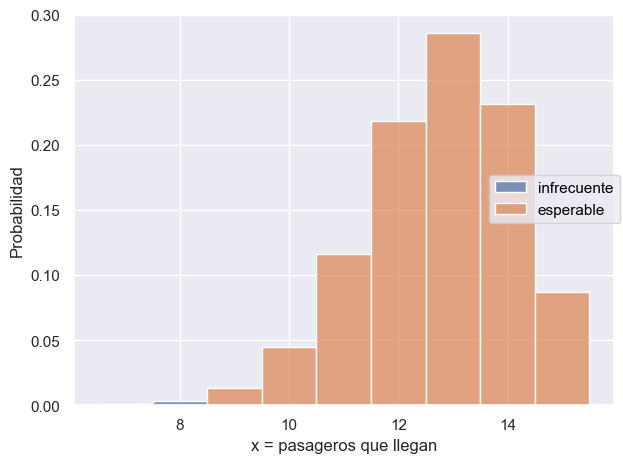

In [14]:
# Sucesos frecuentes y raros o infrecuentes
df_m = df_gr.round(3).set_index('x')
print(df_m)
# Añadir una columna de color
df_m['Miembros'] = ['esperable' if i > 8 else 'infrecuente' for i in df_gr['x']]

# Crear la figura y los ejes usando seaborn.objects
hist = (
    so.Plot(df_m, x='x', y='p', color='Miembros')
    .add(so.Bars())
    .label(x="x = pasageros que llegan", y="Probabilidad", color="")
)

# Mostrar el gráfico , color = df_miembros['x'][df_miembros['x'] < 8]
hist.show()

**Resultados infrecuentes:**
+ La regla del intervalo nos dice que los resultados infrecuentes son aquellos con una probabilidad acumulada menor al 5%.
+ Se utiliza la probabilidad acumulada porque aunque los resultados son muy poco probables, siguen teniendo una probabilidad.
    + Estamos hablando de una baja probabilidad de 0 o 1 o 2 o 3 o 4 o 5 o 6 o 7 o 8 de un conjunto de 15 alumnos.
    + La probabilidad acumulada (['p-acu'] ) no crece hasta 8.
        + Esta probabilidad se hace significativa (> 5% cuando x > 8)
    + La probabilidad acumulada invertida (['p-acr']) disminuye abruptamente a partir de 8 personas (desde 15 a 0).
+ Se ve como que lleguen de 15 a 9 pasajeros cubre el 95% de los casos más probables. (en la probabilidad acumulada reversa)
+ Se ve que lleguen de 0 a 8 pasajeros cubre el 5% de los casos probables.

### Analisis de riesgo
#### ¿Existe riesgo de que no hayan asientos disponibles?
Este riesgo es equivalente a que lleguen justo 15 personas a tomar el avión.

In [8]:
# Revisamos las probabilidades acumuladas untilzando el criterio el criterio visto hasta ahora:
print(df_m[['p', 'p-acu','Miembros']])
print("Ver la tabla y la grafica de probabilidad acumulada")

        p  p-acu     Miembros
x                            
0   0.000  0.000  infrecuente
1   0.000  0.000  infrecuente
2   0.000  0.000  infrecuente
3   0.000  0.000  infrecuente
4   0.000  0.000  infrecuente
5   0.000  0.000  infrecuente
6   0.000  0.000  infrecuente
7   0.001  0.001    esperable
8   0.003  0.004    esperable
9   0.013  0.017    esperable
10  0.045  0.062    esperable
11  0.116  0.177    esperable
12  0.218  0.396    esperable
13  0.286  0.681    esperable
14  0.231  0.913    esperable
15  0.087  1.000    esperable
Ver la tabla y la grafica de probabilidad acumulada


**Observación**
Como se ve en la tabla y en la grafica la cantindad de alumnos que aprueban suele ser mayor que 6:
+ Si nos remitimos a la tabla obtenemos el siguiente resultado:
    + P(15) = **0.087**

**Interpretación**
+ **15** personas llegando a tomar el avión es poco probable pero mayor al 5%.
+ Una selección y composición con 15 pasajeros como esta, **no implica necesariamente un suceso imposible.**.
+ Una selección y composición con 15 pasajeros como esta, **NO implica un suceso infrecuente**.

#### ¿Será la probabilidad lo suficientemente baja para que la sobreventa no sea un problema real para los pasajeros?
No. Esta probabilidad no es lo suficientemente baja para evitar riesgo de problemas con los pasajeros.

__________________________________________________________________________________________________________________________